In [121]:
from pandas import read_csv, Timestamp
from numpy import nan
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import subplots, savefig, show
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import figure, savefig, show, title
from seaborn import heatmap

In [140]:
register_matplotlib_converters()
filename = "data/set1_NYC_collisions_tabular.csv"
data = read_csv(filename, parse_dates=['CRASH_DATE'], infer_datetime_format=True)
(data['CRASH_DATE'].iloc[0] - Timestamp('2021-01-01')).days

0

In [141]:
initial_date = Timestamp('2021-01-01')
data['CRASH_HOURS'] = (data['CRASH_DATE'] - initial_date).dt.days * 24 + data['CRASH_TIME'].str.split(':').str[0].astype(int)

columns_to_correlate = ['CRASH_HOURS','PERSON_AGE','COMPLAINT','EMOTIONAL_STATUS','SAFETY_EQUIPMENT']
data = data[columns_to_correlate]

for col in columns_to_correlate:
    print('\n#'+col)
    print(data[col].value_counts())


#CRASH_HOURS
4477    31
6512    31
4046    30
3407    28
1602    28
        ..
1826     1
6502     1
1822     1
6509     1
73       1
Name: CRASH_HOURS, Length: 7099, dtype: int64

#PERSON_AGE
 25.0      1372
 26.0      1354
 30.0      1332
 27.0      1325
 28.0      1313
           ... 
-959.0        1
-961.0        1
 97.0         1
 1050.0       1
 4030.0       1
Name: PERSON_AGE, Length: 125, dtype: int64

#COMPLAINT
Complaint of Pain or Nausea           27958
None Visible                           4870
Minor Bleeding                         2719
Contusion - Bruise                     2252
Whiplash                               1909
Unknown                                1708
Abrasion                               1674
Fracture - Distorted - Dislocation      883
Internal                                631
Concussion                              333
Severe Bleeding                         201
Severe Lacerations                      184
Crush Injuries                          182
Mi

In [142]:
complaint_encode = { # how severe are the complaints
    'Complaint of Pain or Nausea': 1,
    'Minor Bleeding':2,
    'None Visible': 0,
    'Contusion - Bruise': 2,
    'Severe Bleeding': 7,
    'Internal': 6,
    'Severe Lacerations':7,
    'Abrasion': 2,
    'Fracture - Distorted - Dislocation': 4,
    'Whiplash': 2, #passes after some weeks
    'Unknown': nan,
    'Concussion': 10,
    'Crush Injuries': 6,
    'Minor Burn': 2,
    'Paralysis': 9,
    'Amputation': 7,
    'Moderate Burn': 4,
    'Severe Burn': 6,
    'Does Not Apply': nan
}
data["COMPLAINT"].replace(complaint_encode, inplace=True)

emotion_status_encode = { # how well is the person emotionally
    'Conscious':10,
    'Apparent Death': 0,
    'Semiconscious': 4,
    'Shock': 8,
    'Unknown': nan,
    'Unconscious': 2,
    'Incoherent': 7,
    'Does Not Apply': nan
}
data["EMOTIONAL_STATUS"].replace(emotion_status_encode, inplace=True)

safety_equipment_encode = { # how secure is the equipement
    'Lap Belt & Harness': 10,
    'Helmet (Motorcycle Only)': 1,
    'Air Bag Deployed/Lap Belt/Harness':10,
    'Unknown':nan,
    'None': 0,
    'Lap Belt':10,
    'Helmet Only (In-Line Skater/Bicyclist)': 1,
    'Child Restraint Only': 7,
    'Helmet/Other (In-Line Skater/Bicyclist)':5,
    'Air Bag Deployed/Child Restraint':10,
    'Air Bag Deployed': 3,
    'Other': 5,
    'Harness': 10,
    'Air Bag Deployed/Lap Belt': 10,
    'Pads Only (In-Line Skater/Bicyclist)': 4,
    'Stoppers Only (In-Line Skater/Bicyclist)': 1
}
data["SAFETY_EQUIPMENT"].replace(safety_equipment_encode, inplace=True)

In [143]:
corr_mtx = data.corr()
print(corr_mtx)

                  CRASH_HOURS  PERSON_AGE  COMPLAINT  EMOTIONAL_STATUS  \
CRASH_HOURS          1.000000   -0.000292   0.001690          0.000483   
PERSON_AGE          -0.000292    1.000000  -0.000941         -0.004179   
COMPLAINT            0.001690   -0.000941   1.000000         -0.334069   
EMOTIONAL_STATUS     0.000483   -0.004179  -0.334069          1.000000   
SAFETY_EQUIPMENT    -0.047738    0.025870  -0.203894          0.097459   

                  SAFETY_EQUIPMENT  
CRASH_HOURS              -0.047738  
PERSON_AGE                0.025870  
COMPLAINT                -0.203894  
EMOTIONAL_STATUS          0.097459  
SAFETY_EQUIPMENT          1.000000  


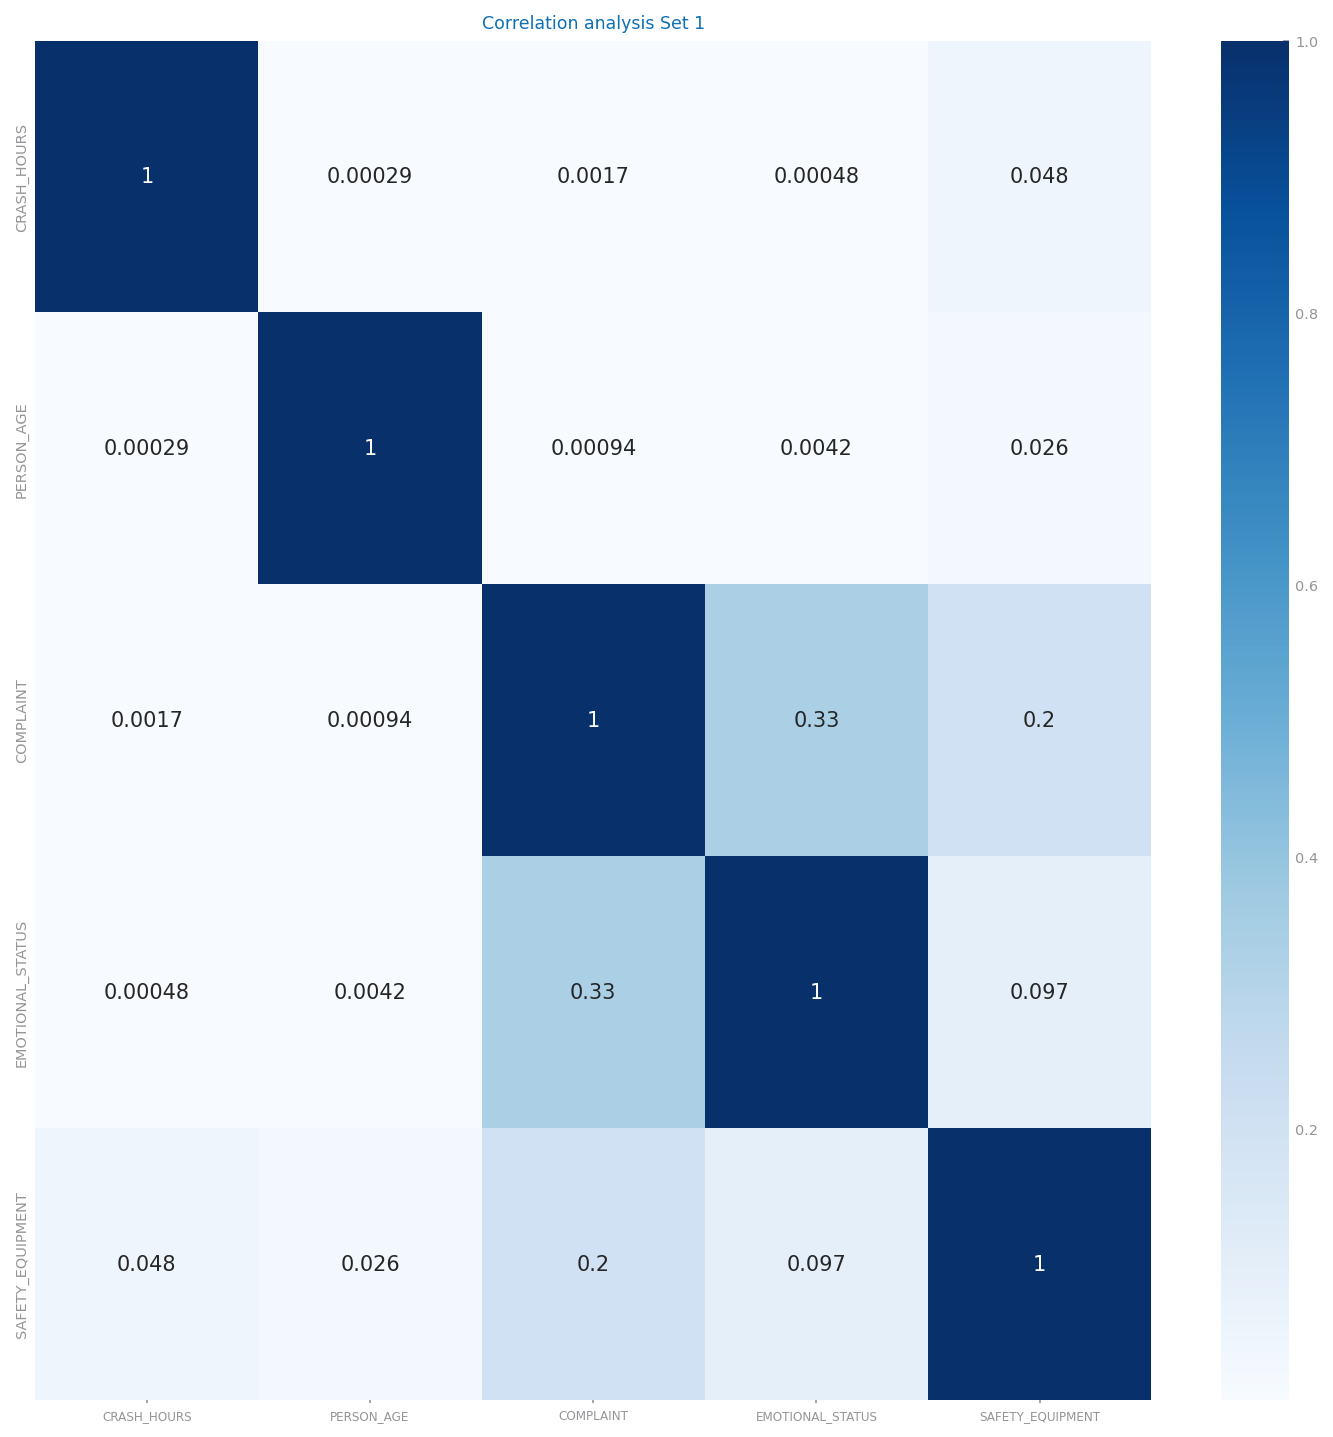

In [144]:
fig = figure(figsize=[12, 12])
fig.patch.set_facecolor('white')
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
title('Correlation analysis Set 1')
savefig(f'images/correlation_analysis_set1.png')
show()